# Neural Network Essential Training 

In [68]:
from keras.datasets import mnist  
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
y_train.shape

(60000,)

In [49]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

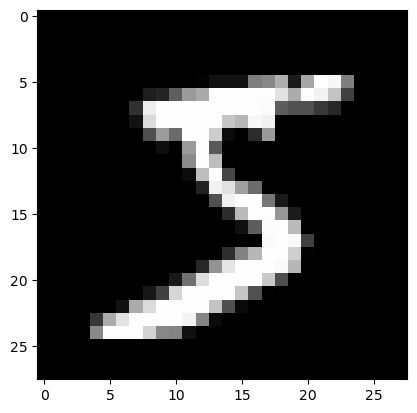

In [50]:
plt.imshow(X_train[0], cmap='gray')

In [51]:
y_train[0]

5

### Preprocessing the image data

In [52]:
image_height, image_width = 28, 28


In [53]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)

In [54]:
X_train.shape

(60000, 784)

In [55]:
X_test.shape

(10000, 784)

In [56]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [57]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [58]:
X_train /= 255.0 
X_test /= 255.0

In [59]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
y_train.shape

(60000,)

In [ ]:
y_train = to_categorical(y_train,10)

y_train.shape

(60000, 10)

In [62]:
y_test = to_categorical(y_test,10)

y_test.shape

(10000, 10)

In [69]:
model = Sequential()

In [70]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))    

/home/micheal/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-13 12:28:46.588451: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Compile the model

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
784*512+512

401920

In [75]:
512*512+512

262656

In [76]:
512*10+10

5130

### Train the model

In [79]:
history = model.fit(X_train, 
          y_train,
          epochs=12,
          validation_data=(X_test, y_test))

Epoch 1/12
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 2:27 79ms/step - accuracy: 1.0000 - loss: 0.0479

2025-06-13 12:35:01.096372: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9698 - loss: 0.0991 - val_accuracy: 0.9623 - val_loss: 0.1169
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9818 - loss: 0.0574 - val_accuracy: 0.9745 - val_loss: 0.0821
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9852 - loss: 0.0434 - val_accuracy: 0.9805 - val_loss: 0.0673
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9899 - loss: 0.0324 - val_accuracy: 0.9781 - val_loss: 0.0806
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9767 - val_loss: 0.0842
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 20ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9781 - val_loss: 0.0853
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9805 - val_loss: 0.0889
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9945 - loss: 0.01

### What is the accuracy of the model

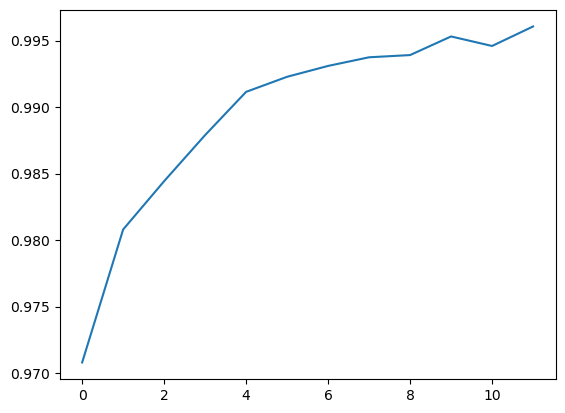

In [81]:
plt.plot(history.history['accuracy'])

### The accuracy of training and validation with loss

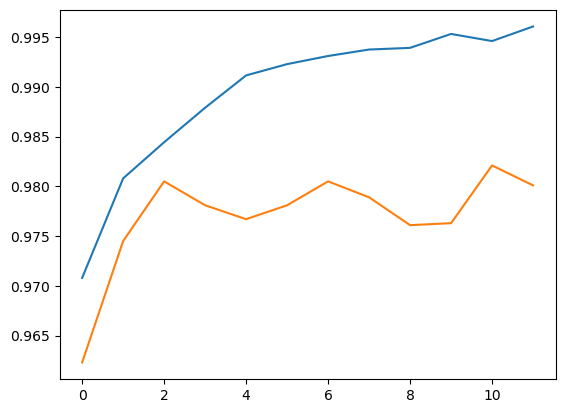

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

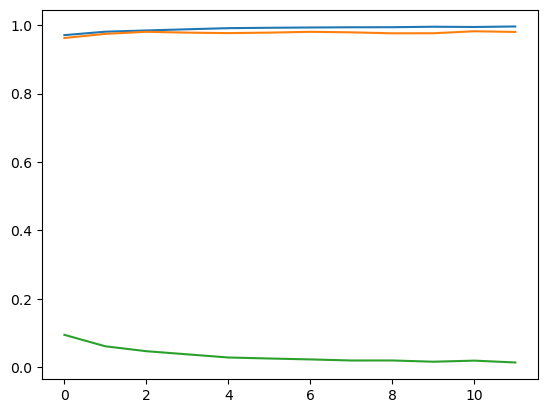

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

### Evaluating the model

In [85]:
score = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9756 - loss: 0.1483


## Convolutions Neural Networks

In [2]:
# !pip install keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

2025-06-17 10:11:16.216558: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-17 10:11:18.333936: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-17 10:11:19.718912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750151480.840887   60006 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750151481.185323   60006 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-17 10:11:23.979146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre_processing

In [19]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000, 28, 28, 1) # the 1 is for the channel dimension 
X_train = X_train.astype('float32')
X_train /= 255.0

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test.astype('float32')
X_test /= 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Create and compile the model

In [21]:
cnn = Sequential()

In [22]:
cnn.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), padding='same', activation='relu'))

/home/micheal/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.add(MaxPooling2D())

In [24]:
cnn.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))

In [25]:
cnn.add(MaxPooling2D())

In [26]:
cnn.add(Flatten())

In [27]:
cnn.add(Dense(1024, activation='relu'))

In [28]:
cnn.add(Dense(10, activation='softmax')) # because it is output layer

In [29]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
print(cnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

None


### Train the model

In [33]:
cnn.load_weights('/home/micheal/Documents/Python_Library/Teaching_File/Ex_Files_Neural_Networks_EssT/Exercise Files/Ch05/05_03/weights/cnn-model5.h5')

In [34]:
score = cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9913 - loss: 0.0322


In [35]:
score

[0.026782650500535965, 0.9929999709129333]

# Image_Augmentation

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input

In [42]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

jf_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    horizontal_flip = True
)

In [43]:
train_generator = train_datagen.flow_from_directory('/home/micheal/Documents/Python_Library/Teaching_File/Ex_Files_Neural_Networks_EssT/Exercise Files/Ch06/06_02/images/sample-train/',target_size=(150,150), save_to_dir='/home/micheal/Documents/Python_Library/Teaching_File/Ex_Files_Neural_Networks_EssT/Exercise Files/Ch06/06_02/images/sample-confirm/')

Found 0 images belonging to 2 classes.
